#Лабораторная работа №1#
*Вариант 6*
- Сравнить методы по количеству итераций и количеству вычислений функции в зависимости от точности. Нужно также указать, как изменяется отрезок при переходе от одной итерации к другой.

- Протестировать на различных полиномах

- могут ли метод залотого сечения/Брента не найти локальный минимум многомодальнй функции?

- Сделать отчет


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def f(x):
    return np.sin(x) * (x**2)

def g(x):
    return (x + 1) * (x + 2) * (x - 3) * (x + 4) * (x + 5)

def h(x):
    return x**2 - 16/x

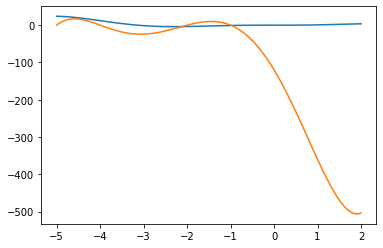

In [ ]:
x = np.linspace(-5,2,100)
plt.plot(x,f(x))

x = np.linspace(-5,2,100)
plt.plot(x,g(x));

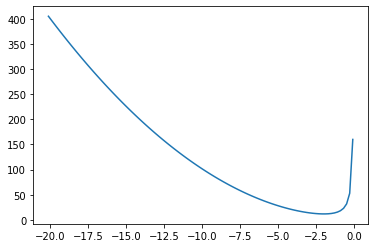

In [ ]:
x = np.linspace(-20.1,-0.1,100)
plt.plot(x,h(x));

In [ ]:
#a, b = map(float, input("Enter parameters a b: ").split())
#p = int(input("Enter precision p: "))
#e = 10 ** (-p)

#Метод дихотомии#

In [ ]:
def dichotomyMethod(f, a, b, p):
    e = 10 ** (-p)
    A = [a]
    B = [b]
    Y = []
    Z = []
    counter = 0
    f_counter = 0

    while True:
        Y.append((A[counter] + B[counter] - e) / 2)
        f_y_k = f(Y[counter])
        Z.append((A[counter] + B[counter] + e) / 2)
        f_z_k = f(Z[counter])
        if f_y_k <= f_z_k:
            A.append(A[counter])
            B.append(Z[counter])
        elif f_y_k > f_z_k:
            A.append(Y[counter])
            B.append(B[counter])
        if round(B[counter] - A[counter], p + 1) <= e:
            break
        counter += 1
        f_counter += 2

    x_min = (A[counter] + B[counter]) / 2

    print(f"Total operations performed: {counter}")
    print(f"The function was calculated: {f_counter} times")
    print(f"Minimun of f(x) on the interval [{a}, {b}] is {f(x_min)} at x = {x_min}")

    return x_min, np.array(A), np.array(B), counter, f_counter

Total operations performed: 18
The function was calculated: 36 times
Minimun of f(x) on the interval [-5, 2] is -3.94530162463663 at x = -2.288917356491089


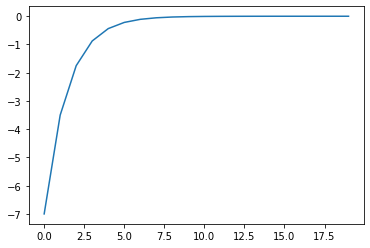

In [ ]:
x_min, A, B, p, t = dichotomyMethod(f, -5, 2, 3)

plt.plot(np.array(A) - np.array(B));

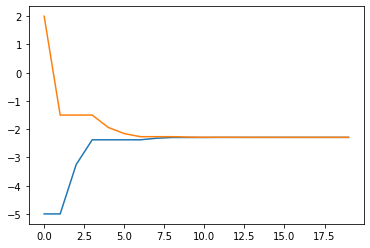

In [ ]:
plt.plot(A)
plt.plot(B)

Total operations performed: 26
The function was calculated: 52 times
Minimun of f(x) on the interval [-100, 100] is -506.483374267551 at x = 1.9061660176463424


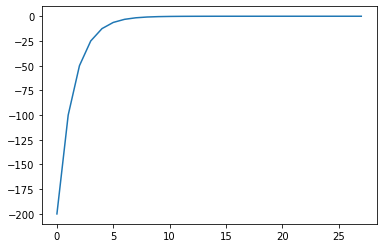

In [ ]:
x_min, A, B = dichotomyMethod(g, -100, 100, 4)

plt.plot(np.array(A) - np.array(B));

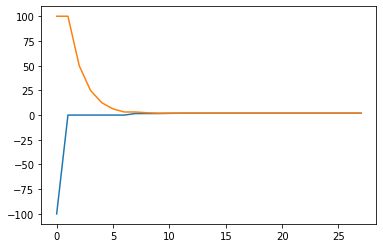

In [ ]:
plt.plot(A)
plt.plot(B)

#Метод золотого сечения#

In [ ]:
def goldenRatioMethod(f, a, b, p):
    fi = (3 - math.sqrt(5)) / 2
    k = 0
    f_counter = 0
    e = 10 ** (-p)
    A = [a]
    B = [b]
    Y = [A[k] + fi * (B[k] - A[k])]
    Z = [A[k] + B[k] - Y[k]]

    while True:
        f_y_k = f(Y[k])
        f_z_k = f(Z[k])
        f_counter += 2
        if f_y_k <= f_z_k:
            A.append(A[k])
            B.append(Z[k])
            Y.append(A[k+1] + B[k+1] - Y[k])
            Z.append(Y[k])
        elif f_y_k > f_z_k:
            A.append(Y[k])
            B.append(B[k])
            Y.append(Z[k])
            Z.append(A[k+1] + B[k+1] - Z[k])
        if round(abs(A[k] - B[k]), p+1) <= e:
            break
        k += 1

    x_min = (A[k] + B[k]) / 2

    print(f"Total operations performed: {k}")
    print(f"The function was calculated: {f_counter} times")
    print(f"Minimun of f(x) on the interval [{a}, {b}] is {f(x_min)} at x = {x_min}")

    return x_min, np.array(A), np.array(B), k, f_counter

Total operations performed: 19
The function was calculated: 40 times
Minimun of f(x) on the interval [-5, 2] is -3.945301595003215 at x = -2.28901431784979


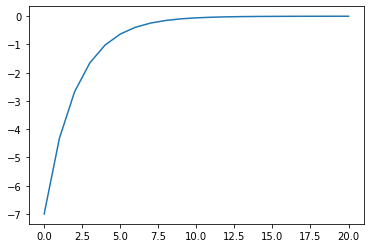

In [ ]:
x_min, A, B, p, i = goldenRatioMethod(f, -5, 2, 3)

plt.plot(np.array(A)-np.array(B));

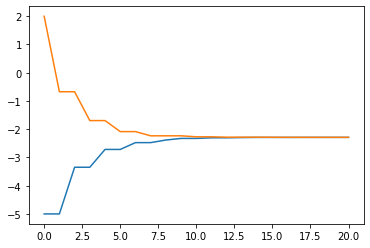

In [ ]:
plt.plot(A)
plt.plot(B);

Total operations performed: 31
The function was calculated: 64 times
Minimun of f(x) on the interval [-100, 100] is -0.9999999999802818 at x = -0.9999955594812704


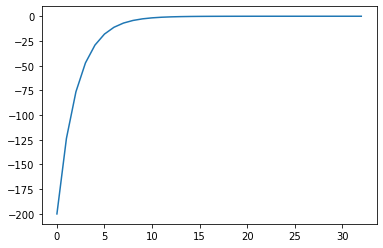

In [ ]:
x_min, A, B = goldenRatioMethod(g, -100, 100, 4)

plt.plot(np.array(A)-np.array(B));

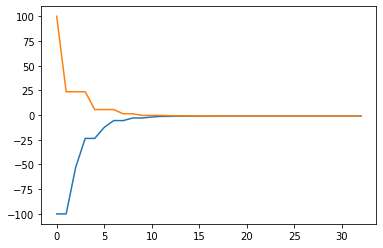

In [ ]:
plt.plot(A)
plt.plot(B);

#Метод Фибоначчи#

In [ ]:
def createFib(a, b, e):
    k = int((b - a) / e)
    if k == 1:
        return [1]
    a = [1, 1]

    tmp = [1, 1]
    while k >= a[len(a)-1]:
        tmp[0], tmp[1] = tmp[1], tmp[0] + tmp[1]
        a.append(tmp[1])
    return a

In [ ]:
def FibonacciMethod(f, a, b, p):
    e = 10 ** (-p)
    A = [a]
    B = [b]
    k = 0
    f_counter = 0
    F = createFib(a, b, e)
    n = len(F)-1
    Y = [A[k] + F[n - 2] / F[n] * (B[k] - A[k])]
    Z = [A[k] + F[n - 1] / F[n] * (B[k] - A[k])]

    while True:
        f_y_k = f(Y[k])
        f_z_k = f(Z[k])
        f_counter += 2
        if f_y_k <= f_z_k:
            A.append(A[k])
            B.append(Z[k])
            Z.append(Y[k])
            Y.append(A[k+1] + F[n-k-3]/F[n-k-1]*(B[k+1] - A[k+1]))
        elif f_y_k > f_z_k:
            A.append(Y[k])
            B.append(B[k])
            Y.append(Z[k])
            Z.append(A[k+1] + F[n-k-2]/F[n-k-1]*(B[k+1] - A[k+1]))

        if k != n - 3:
            k += 1
            continue
        elif k == n - 3:
            Y[n-2] = Y[n-3]
            Z[n-2] = Y[n-2] + e

            f_y = f(Y[n-2])
            f_z = f(Z[n-2])
            if f_y_k <= f_z_k:
                A[n-2] = A[n-3]
                B[n-2] = Z[n-2]
            elif f_y_k > f_z_k:
                A[n-2] = Y[n-2]
                B[n-2] = B[n-3]
            break


    x_min = (A[n-2] + B[n-2]) / 2

    print(f"Total operations performed: {k}")
    print(f"The function was calculated: {f_counter} times")
    print(f"Minimun of f(x) on the interval [{a}, {b}] is {f(x_min)} at x = {x_min}")

    return x_min, np.array(A), np.array(B), k, f_counter

Total operations performed: 17
The function was calculated: 36 times
Minimun of f(x) on the interval [-5, 2] is -3.9453016195709543 at x = -2.28896647177051


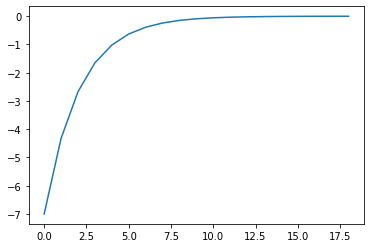

In [ ]:
x_min, A, B, p, r = FibonacciMethod(f, -5, 2, 3)

plt.plot(np.array(A)-np.array(B));

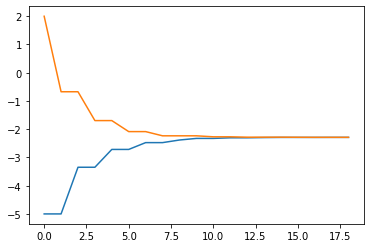

In [ ]:
plt.plot(A)
plt.plot(B);

Total operations performed: 28
The function was calculated: 58 times
Minimun of f(x) on the interval [-100, 100] is -0.9999999999829295 at x = -0.9999958683547739


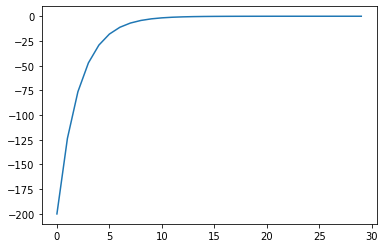

In [ ]:
x_min, A, B = FibonacciMethod(g, -100, 100, 4)

plt.plot(np.array(A)-np.array(B));

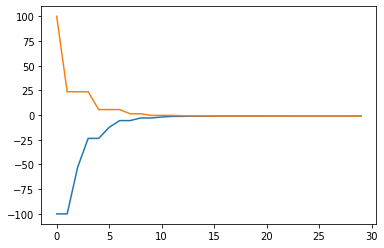

In [ ]:
plt.plot(A)
plt.plot(B);

#Метод парабол#

In [ ]:
def parabola_search(f, a, b, dx, p):
    X_mem = []
    X = [0 for i in range(3)]
    F = [0 for i in range(3)]

    X[0] = a 
    e_1 = 10 ** (-p)
    e_2 = 10 ** (-p-1)
    x_res = a
    flag = False
    X_means = []
    counter = 0
    f_counter = 0

    while True:
        counter += 1
        if not flag:
            X[1]= X[0] + dx
            F[0] = f(X[0])
            F[1] = f(X[1])
            f_counter += 2
            if F[0] > F[1]:
                X[2] = X[0] + 2 * dx
            elif F[0] <= F[1]:
                X[2] = X[0] - dx
            F[2] = f(X[2])
            f_counter += 1
        X_mem.append(X)
        F_min = min(F)
        x_min = X[F.index(F_min)]

        numerator = F[0] * (X[1] ** 2 - X[2] ** 2) + F[1] * (X[2] ** 2 - X[0] ** 2) + F[2] * (X[0] ** 2 - X[1] ** 2)
        denominator = 2 * (F[0] * (X[1] - X[2]) + F[1] * (X[2] - X[0]) + F[2] * (X[0] - X[1]))

        if denominator == 0:
            X[0] = x_min
            continue

        x_mean = round(numerator / denominator, p+4)
        X_means.append(x_mean)
        F_mean = f(x_mean)
        f_counter += 1
        if abs((F_min - F_mean)/(F_mean + 1e-7)) <= e_1 and abs((x_min - x_mean)/(x_mean + 1e-7)) <= e_2:
            x_res = x_mean
            break
        else:
            if X[0] <= x_mean <= X[2]:
                flag = True
                if X[0] < x_mean < X[1]:
                    if F_min < F_mean:
                        X[0], X[1], X[2] = x_min - dx, x_min, x_min + dx
                        F[0], F[1], F[2] = f(X[0]), f(X[1]), f(X[2])
                    else:
                        X[0], X[1], X[2] = x_mean - dx, x_mean, x_mean + dx
                        F[0], F[1], F[2] = f(X[0]), f(X[1]), f(X[2])
                elif X[1] < x_mean < X[2]:
                    X[0], X[1], X[2] = X[1], x_mean, X[2]
                    F[0], F[1], F[2] = f(X[0]), f(X[1]), f(X[2])
                f_counter += 3
                continue
            elif X[0] > x_mean or x_mean > X[2]:
                flag = False
                X[0] = x_mean
                continue

    print(f'Total operations performed: {counter}')
    print(f"The function was calculated: {f_counter} times")
    print(f'Minimum of f(x) on the interval [{a}, {b}] is at y = {f(x_res)} and x = {x_res}')

    return x_res, X_means, X_mem, counter, f_counter


Total operations performed: 12
The function was calculated: 48 times
Minimum of f(x) on the interval [-5, 0] is at y = -3.931536444089165 and x = -2.231173072


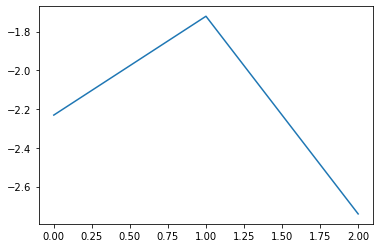

In [ ]:
x, X, X_mem, ew, fds = parabola_search(f, -5, 0, 0.51, 5)

plt.plot(np.array(X_mem)[:][2]);

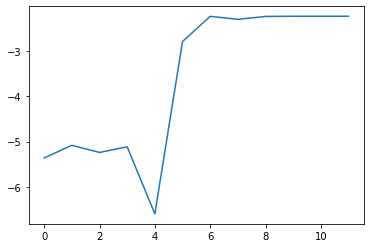

In [ ]:
plt.plot(X);

In [ ]:
'''
def parabola_search(f, x1, x2, x3, p):
    A = [x1]
    X = [x2]
    B = [x3]
    eps = 10 ** (-p)
    f1, f2, f3 = f(x1), f(x2), f(x3)
    while x3 - x1 > eps:
        u = x2 - ((x2 - x1)**2*(f2 - f3) - (x2 - x3)**2*(f2 - f1))/((2*((x2 - x1)*(f2 - f3) - (x2 - x3)*(f2 - f1)))+0.000000001)
        fu = f(u)

        if x2 <= u:
            if f2 <= fu:
                x1, x2, x3 = x1, x2, u
                f1, f2, f3 = f1, f2, fu
            else:
                x1, x2, x3 = x2, u, x3
                f1, f2, f3 = f2, fu, f3
        else:
            if fu <= f2:
                x1, x2, x3 = x1, u, x2
                f1, f2, f3 = f1, fu, f2
            else:
                x1, x2, x3 = u, x2, x3
                f1, f2, f3 = fu, f2, f3
        
        A.append(x1)
        X.append(x2)
        B.append(x3)
    return (x1 + x3) / 2
'''

#Комбинированный метод Брента#

In [ ]:
def brents_method(f, a, c, p, eps):
    counter = 0
    f_counter = 0
    A, C = [a], [c]
    K = (3 - math.sqrt(5)) / 2
    x, w, v = (a + c) / 2, (a + c) / 2, (a + c) / 2
    tmp = f(x)
    f_counter += 1
    fx, fw, fv = tmp, tmp, tmp
    d, e = c - a, c - a
    
    while True:
        counter +=  1
        g, e = e, d

        numerator = (w - x)**2 * (fw - fv) - (w - v)**2 * (fw - fx)
        denominator = 2 * ((w - x) * (fw - fv) - (w - v) * (fw - fx))
        u = w - numerator / (denominator + 10 ** (-p - 4))

        if a + eps <= u <= c - eps and abs(u - x) < g / 2:
            d = np.abs(u - x)
        else:
            if x < (c - a) / 2:
                u = x + K * (c - x)
                d = c - x
            else:
                u = x - K * (x - a)
                d = x - a
        
        if abs(u - x) < eps:
            if (u - x) < 0:
                u = x - eps
            elif abs(u - x) > eps:
                u = x + eps
            else:
                u = x
        
        fu = f(u)
        f_counter += 1
        if fu <= fx:
            if u >= x:
                a = x
            else:
                c = x
            A.append(a)
            C.append(c)
            v, w, x = w, x, u
            fv, fw, fx = fw, fx, fu
        else:
            if u >= x:
                c = u
            else:
                a = u
            A.append(a)
            C.append(c)
            if fu <= fw or w == x:
                v, w = w, u
                fv, fw = fw, fu
            elif fu <= fv or v == x or v == w:
                v = u
                fv = fu

        if round(abs(a - c), p + 1) <= 3*eps:
            break
    
    print(f'Total operations performed: {counter}')
    print(f"The function was calculated: {f_counter} times")
    print(f'Minimum of f(x) on the interval [{A[0]}, {C[0]}] is at y = {f(x)} and x = {x}')

    return x, np.array(A), np.array(C), counter, f_counter

Total operations performed: 9
The function was calculated: 10 times
Minimum of f on the interval [-5, 0] is at y = -3.945301613197624 and x = -2.2889831708310804


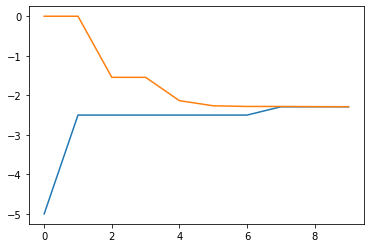

In [ ]:
x, A, C = brents_method(f, -5, 0, 3, 0.001)
plt.plot(A)
plt.plot(C);

-0.8414709848078965

#Всякие приколюхи из интернета#



🤓 We'll compare ['random search', 'binary search', 'golden search', 'parabolic search'] on the (x - 2) * x * (x + 2)**2 function on the [-2, 7] interval
🤓 Random search: 82 function calls. 41 iterations. f = 0.09
🤓 Binary search: 24 function calls. 14 iterations. f = 0.44
🤓 Golden search: 20 function calls. 19 iterations. f = 0.44
🤓 Parabolic search: 43 function calls. 40 iterations. f = 0.44


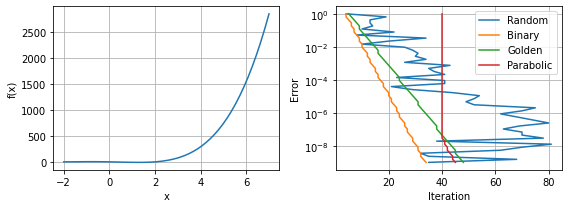

In [ ]:
#@title Line search for unimodal functions. Optimizers comparison { run: "auto" }
# Need to implement brent method, but in scipy
# it has no callbacks right now :(
#===== Libraries =====#
from scipy.optimize import OptimizeResult
from scipy.optimize import minimize
import numpy as np
from matplotlib import pyplot as plt
import math

#===== Algorithms =====#
def callback(xk, f, funs, xs, loc_lens):
    funs.append(f(xk))
    xs.append(xk)
    loc_lens.append(x_b - x_a)

def random_bracket_line_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    funcalls = 0
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        improved = False
        niter += 1
        funcalls += 2
        
        x_guess_left    = np.random.uniform(x_a, x_b)
        x_guess_right   = np.random.uniform(x_a, x_b)
        x_guess_left, x_guess_right = min(x_guess_left, x_guess_right), max(x_guess_left, x_guess_right)
        f_guess_left    = fun(x_guess_left)
        f_guess_right   = fun(x_guess_right)

        if f_guess_left <= f_guess_right:
            x_b = x_guess_right
        else:
            x_a = x_guess_left

        x_best = (x_a + x_b)/2
        f_best = fun(x_best)
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

        
    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=success)

def binary_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    funcalls = 1
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        niter += 1
        x_c = (x_a + x_b) / 2
        x_y = (x_a + x_c) / 2
        funcalls += 1
        if fun(x_y) <= fun(x_c):
            x_b = x_c
            x_c = x_y
        else:
            x_z = (x_b + x_c) / 2
            funcalls += 1
            if fun(x_c) <= fun(x_z):
                x_a = x_y
                x_b = x_z
            else:
                x_a = x_c
                x_c = x_z

        x_best = x_c
        f_best = fun(x_c)
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

        
    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=success)

def golden_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x_best = x0
    funcalls = 1
    niter = 0
    stop = False
    success = False

    while not stop and niter < maxiter:
        niter += 1
        tau = (np.sqrt(5) + 1) / 2.0
        x_y = x_a + (x_b - x_a) / tau**2
        x_z = x_a + (x_b - x_a) / tau
        funcalls += 1
        if fun(x_y) <= fun(x_z):
            x_b = x_z
            x_z = x_y
            x_y = x_a + (x_b - x_a) / tau**2
        else:
            x_a = x_y
            x_y = x_z
            x_z = x_a + (x_b - x_a) / tau

        x_best = x_z
        f_best = fun(x_z)
        
        if callback is not None:
            callback(x_best)
        
        if (x_b - x_a < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (x_b - x_a < tol):
            stop = True
            break

    return OptimizeResult(fun=f_best, x=x_best, nit=niter,
                          nfev=funcalls, success=success)
    
def parabolic_search(fun, x0, args=(), maxfev=None,
        maxiter=100, callback=None, **options):
    tol, x_a, x_b = options['tol'], options['x_a'], options['x_b']
    x1, x2, x3 = x_a, (x_a + x_b)/2, x_b
    x_best = x2
    funcalls = 3
    niter = 0
    stop = False
    success = False

    f1, f2, f3 = fun(x1), fun(x2), fun(x3)

    while not stop and niter < maxiter:
        funcalls += 1
        niter += 1

        u = x2 - ((x2 - x1)**2*(f2 - f3) - (x2 - x3)**2*(f2 - f1))/(2*((x2 - x1)*(f2 - f3) - (x2 - x3)*(f2 - f1)))
        fu = fun(u)

        if x2 <= u:
            if f2 <= fu:
                x1, x2, x3 = x1, x2, u
                f1, f2, f3 = f1, f2, fu
            else:
                x1, x2, x3 = x2, u, x3
                f1, f2, f3 = f2, fu, f3
        else:
            if fu <= f2:
                x1, x2, x3 = x1, u, x2
                f1, f2, f3 = f1, fu, f2
            else:
                x1, x2, x3 = u, x2, x3
                f1, f2, f3 = fu, f2, f3

        x_best = (x1 + x3)/2

        if callback is not None:
            callback(x2)
        
        if (abs(x3 - x1) < tol):
            success = True

        if (maxfev is not None and funcalls >= maxfev) or (abs(x3 - x1) < tol):
            stop = True
            break

    return OptimizeResult(fun=fun(x_best), x=x_best, nit=niter,
                          nfev=funcalls, success=success)

#===== Functions =====#
# "sin(sin(sin(sqrt(x/2))))"
f_1 = lambda x: np.sin(np.sin(np.sin(np.sqrt(x/2)))) + 1

# 'Inverse Maxwell'
def inverse_maxwell(x, a):
    return -np.sqrt(2/math.pi) * x**2*np.exp(-x**2/(2*(a)**2))/(a)**3
f_2 = lambda x: inverse_maxwell(x, 2) + 1 

# "(x - 2) * x * (x + 2)**2"
f_3 = lambda x: (x - 2) * x * (x + 2)**2 + 10 

def callback(xk, f, funs, xs):
    funs.append(f(xk))
    xs.append(xk)
#===== Input reading =====#
optimizers = []
Random_bracket_search = True #@param {type:"boolean"}
Binary_search = True #@param {type:"boolean"}
Golden_search = True #@param {type:"boolean"}
Parabolic_search = True #@param {type:"boolean"}
if Random_bracket_search:
    optimizers.append('random search')
if Binary_search:
    optimizers.append('binary search')
if Golden_search:
    optimizers.append('golden search')
if Parabolic_search:
    optimizers.append('parabolic search')

Function = '(x - 2) * x * (x + 2)**2' #@param ['Inverse Maxwell', "sin(sin(sin(sqrt(x/2))))", "(x - 2) * x * (x + 2)**2"] 
a = -2 #@param {type:"slider", min:-5, max:5, step:1}
b = 7 #@param {type:"slider", min:0, max:10, step:1}
tolerance = 1e-3
tolerances_bound =  1e-9#@param {type:"number"}
tolerances = np.logspace(np.log10(tolerances_bound), 0)
print(f"🤓 We'll compare {optimizers} on the {Function} function on the [{a}, {b}] interval")

if Function == 'Inverse Maxwell':
    func = f_2
elif Function == 'sin(sin(sin(sqrt(x/2))))':
    func = f_1
elif Function == '(x - 2) * x * (x + 2)**2':
    func = f_3

x = np.linspace(a,b)

# fig, [[ax1,ax2], ax3]  = plt.subplots(2, 2, figsize=(12,8))

fig = plt.figure(figsize = (8,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(x, func(x))
ax1.set_ylabel('f(x)')
ax1.set_xlabel('x')
ax1.grid()

x0 = (a+b)/2   

#===== Optimization =====#
for opt in optimizers:
    if opt == 'random search':
        x0 = (a+b)/2 
        funs_rbls = []
        xs_rbls = []
        n_it_rbls = []
        callback_rbls = lambda xk: callback(xk, func, funs_rbls, xs_rbls)
        res = minimize(func, x0, method=random_bracket_line_search, callback=callback_rbls, options={'maxiter': 100, 'tol': tolerance, 'x_a': a, 'x_b': b})
        print(f'🤓 Random search: {res.nfev} function calls. {res.nit} iterations. f = {funs_rbls[-1]:.2f}')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=random_bracket_line_search, callback=callback_rbls, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_rbls.append(res.nit)
        ax2.semilogy(n_it_rbls, tolerances , label='Random')
    elif opt == 'binary search':
        x0 = (a+b)/2 
        funs_bs = []
        xs_bs = []
        n_it_bs = []
        callback_bs = lambda xk: callback(xk, func, funs_bs, xs_bs)
        res = minimize(func, x0, method=binary_search, callback=callback_bs, options={'maxiter': 100, 'tol': tolerance, 'x_a': a, 'x_b': b})
        print(f'🤓 Binary search: {res.nfev} function calls. {res.nit} iterations. f = {funs_rbls[-1]:.2f}')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=binary_search, callback=callback_bs, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_bs.append(res.nit)
        ax2.semilogy(n_it_bs, tolerances, label='Binary')
    elif opt == 'golden search':
        x0 = (a+b)/2 
        funs_gs = []
        xs_gs = []
        n_it_gs = []
        callback_gs = lambda xk: callback(xk, func, funs_gs, xs_gs)
        res = minimize(func, x0, method=golden_search, callback=callback_gs, options={'maxiter': 100, 'tol': tolerance, 'x_a': a, 'x_b': b})
        print(f'🤓 Golden search: {res.nfev} function calls. {res.nit} iterations. f = {funs_rbls[-1]:.2f}')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=golden_search, callback=callback_gs, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_gs.append(res.nit)
        ax2.semilogy(n_it_gs, tolerances, label='Golden')
    elif opt == 'parabolic search':
        x0 = (a+b)/2 
        funs_ps = []
        xs_ps = []
        n_it_ps = []
        callback_ps = lambda xk: callback(xk, func, funs_ps, xs_ps)
        res = minimize(func, x0, method=parabolic_search, callback=callback_ps, options={'maxiter': 100, 'tol': tolerance, 'x_a': a, 'x_b': b})
        print(f'🤓 Parabolic search: {res.nfev} function calls. {res.nit} iterations. f = {funs_rbls[-1]:.2f}')
        for tolerance_ in tolerances:
            res = minimize(func, x0, method=parabolic_search, callback=callback_ps, options={'maxiter': 1000, 'tol': tolerance_, 'x_a': a, 'x_b': b})
            n_it_ps.append(res.nit)
        ax2.semilogy(n_it_ps, tolerances, label='Parabolic')

ax2.set_ylabel('Error')
ax2.set_xlabel('Iteration')
ax2.grid()
ax2.legend()

fig.tight_layout()
plt.show()


In [ ]:
'''
def foo(x):
    return [(i+1)**2 for i in range(x)]
'''

def boo(f, x):
    x = f(x)
    print(x)

In [ ]:
def foo(x):
    return [(i+1)**2 for i in range(x)]
boo(foo, 5)

[1, 4, 9, 16, 25]


#Итог#

Теперь рассмотри эффектривность кажного ищ методов на заданных функциях

Унимодальный промежуток

In [ ]:
def test1(method_name, f, a, b, method=""):
    res = [[] for i in range(6)]
    # 0 - p/epsilon
    # 1 - counter
    # 2 - f_counter
    # 3 - x
    # 4 - left_bound / min_point_migration
    # 5 - right_bound

    base_methods = set(['D', 'G', 'F'])
    if method_name in base_methods:
        for i in range(1, 7):
            x, A, B, c, f_c = method(f, a, b, i)
            res[0].append(i)
            res[1].append(c)
            res[2].append(f_c)
            res[3].append(x)
            res[4].append(A)
            res[5].append(B)
        return np.array(res)

    elif method_name == 'P':
        for i in range(1, 7):
            x, A, B, c, f_c = parabola_search(f, -3.5, b, 0.05, i)
            res[0].append(i)
            res[1].append(c)
            res[2].append(f_c)
            res[3].append(x)
            res[4].append(A)
        return np.array(res)
    
    for i in range(1, 7):
        x, A, B, c, f_c = brents_method(f, a, b, i, 10 ** (-i))
        res[0].append(i)
        res[1].append(c)
        res[2].append(f_c)
        res[3].append(x)
        res[4].append(A)
        res[5].append(B)
    return res

In [ ]:
functions = [('D', dichotomyMethod),
             ('G', goldenRatioMethod),
             ('F', FibonacciMethod),
             ('P', parabola_search),
             ('B', brents_method)]

res1 = []

for i in functions:
    res1.append(test1(i[0], f, -5, 0, i[1]))

Total operations performed: 10
The function was calculated: 20 times
Minimun of f(x) on the interval [-5, 0] is -3.945286852015593 at x = -2.287060546875
Total operations performed: 14
The function was calculated: 28 times
Minimun of f(x) on the interval [-5, 0] is -3.945301535266634 at x = -2.288783874511718
Total operations performed: 17
The function was calculated: 34 times
Minimun of f(x) on the interval [-5, 0] is -3.9453016246827124 at x = -2.288917804718017
Total operations performed: 20
The function was calculated: 40 times
Minimun of f(x) on the interval [-5, 0] is -3.9453016252842414 at x = -2.288929869222641
Total operations performed: 24
The function was calculated: 48 times
Minimun of f(x) on the interval [-5, 0] is -3.9453016252843067 at x = -2.288929795167148
Total operations performed: 27
The function was calculated: 54 times
Minimun of f(x) on the interval [-5, 0] is -3.945301625284326 at x = -2.288929731889631
Total operations performed: 9
The function was calculated:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
for i in range(5):
    print(functions[i][0] + " method")
    for j in range(4):
        print(res1[i][j])
    print()

D method
[1 2 3 4 5 6]
[10 14 17 20 24 27]
[20 28 34 40 48 54]
[-2.287060546875 -2.288783874511718 -2.288917804718017 -2.288929869222641
 -2.288929795167148 -2.288929731889631]

G method
[1 2 3 4 5 6]
[9 13 18 23 28 32]
[20 28 38 48 58 66]
[-2.2871376374779295 -2.290103240701984 -2.2888683401936483
 -2.2889314667221017 -2.2889301231088455 -2.2889298054194596]

F method
[1 2 3 4 5 6]
[6 11 16 21 25 30]
[14 24 34 44 52 62]
[-2.2727272727272725 -2.2868852459016393 -2.2888569844789357
 -2.288887020993002 -2.2889314466025836 -2.288930089015704]

P method
[1, 2, 3, 4, 5, 6]
[3, 4, 5, 5, 5, 5]
[12, 16, 20, 20, 20, 20]
[-2.28872, -2.288396, -2.2883957, -2.28839574, -2.288395744, -2.2883957441]

B method
[1, 2, 3, 4, 5, 6]
[5, 7, 9, 12, 15, 19]
[6, 8, 10, 13, 16, 20]
[-2.265248870159896, -2.2918960728033824, -2.2889831708310804, -2.2889606608080024, -2.288930034701647, -2.2889281485344726]



In [ ]:
res1[i][4][0]

array([-5.        , -2.55      , -2.55      , -2.55      , -2.55      ,
       -2.396875  , -2.396875  , -2.35859375, -2.33945312, -2.33945312,
       -2.33945312, -2.33945312])

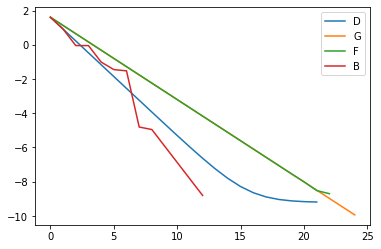

In [ ]:
for j in [0, 1, 2, 4]:
    left = np.array(res1[j][4][3])
    right = np.array(res1[j][5][3])
    plt.plot(np.log(right - left), label=functions[j][0])
plt.legend()
plt.show()

Многомодальный промежуток

In [ ]:
def test2(method_name, f, a, b, method=""):
    res = [[] for i in range(6)]
    # 0 - p/epsilon
    # 1 - counter
    # 2 - f_counter
    # 3 - x
    # 4 - left_bound / min_point_migration
    # 5 - right_bound

    base_methods = set(['D', 'G', 'F'])
    if method_name in base_methods:
        for i in range(1, 7):
            x, A, B, c, f_c = method(f, a, b, i)
            res[0].append(i)
            res[1].append(c)
            res[2].append(f_c)
            res[3].append(x)
            res[4].append(A)
            res[5].append(B)
        return np.array(res)

    elif method_name == 'P':
        for i in range(1, 7):
            x, A, B, c, f_c = parabola_search(f, a, b, 0.51, i)
            res[0].append(i)
            res[1].append(c)
            res[2].append(f_c)
            res[3].append(x)
            res[4].append(A)
        return np.array(res)
    
    for i in range(1, 7):
        x, A, B, c, f_c = brents_method(f, a, b, i, 10 ** (-i))
        res[0].append(i)
        res[1].append(c)
        res[2].append(f_c)
        res[3].append(x)
        res[4].append(A)
        res[5].append(B)
    return res

In [ ]:
def nf(x):
    return (x - 1) * (x - 1) * (x - 4) * (x + 5)

In [ ]:
functions = [('D', dichotomyMethod),
             ('G', goldenRatioMethod),
             ('F', FibonacciMethod),
             ('P', parabola_search),
             ('B', brents_method)]

res2 = []

for i in functions:
    res2.append(test2(i[0], f, -15, -5, i[1]))

Total operations performed: 11
The function was calculated: 22 times
Minimun of f(x) on the interval [-15, -5] is -63.634885815309104 at x = -8.097827148437503
Total operations performed: 15
The function was calculated: 30 times
Minimun of f(x) on the interval [-15, -5] is -63.634981772007535 at x = -8.096235504150393
Total operations performed: 18
The function was calculated: 36 times
Minimun of f(x) on the interval [-15, -5] is -63.6349819426356 at x = -8.096179628372191
Total operations performed: 21
The function was calculated: 42 times
Minimun of f(x) on the interval [-15, -5] is -63.634981951549825 at x = -8.096163237929346
Total operations performed: 25
The function was calculated: 50 times
Minimun of f(x) on the interval [-15, -5] is -63.63498195155431 at x = -8.096163537568302
Total operations performed: 28
The function was calculated: 56 times
Minimun of f(x) on the interval [-15, -5] is -63.63498195155445 at x = -8.096163593626487
Total operations performed: 10
The function 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
for i in range(5):
    print(functions[i][0] + " method")
    for j in range(4):
        print(res2[i][j])
    print()

D method
[1 2 3 4 5 6]
[11 15 18 21 25 28]
[22 30 36 42 50 56]
[-8.097827148437503 -8.096235504150393 -8.096179628372191
 -8.096163237929346 -8.096163537568302 -8.096163593626487]

G method
[1 2 3 4 5 6]
[10 15 20 24 29 34]
[22 32 42 50 60 70]
[-8.090169943749475 -8.096101150197583 -8.09622740325449
 -8.096160758848203 -8.096162420150845 -8.096163545196964]

F method
[1 2 3 4 5 6]
[8 13 17 22 27 32]
[18 28 36 46 56 66]
[-8.125 -8.09143080776456 -8.096108167367074 -8.096142281680162
 -8.096163002085767 -8.096163439415225]

P method
[1, 2, 3, 4, 5, 6]
[2, 2, 2, 7, 7, 8]
[8, 8, 8, 28, 28, 32]
[-14.27322, -14.273218, -14.2732178, -14.26415591, -14.264155914, -14.2641557794]

B method
[1, 2, 3, 4, 5, 6]
[6, 6, 9, 8, 9, 11]
[7, 7, 10, 9, 10, 12]
[-8.090169943749475, -8.100169943749474, -8.096060652741063, -8.096160541238499, -8.096164751408036, -8.096163701224398]



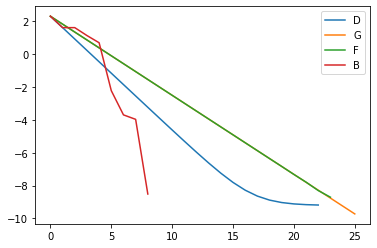

In [ ]:
for j in [0, 1, 2, 4]:
    left = np.array(res2[j][4][3])
    right = np.array(res2[j][5][3])
    plt.plot(np.log(right - left), label=functions[j][0])
plt.legend()
plt.show()

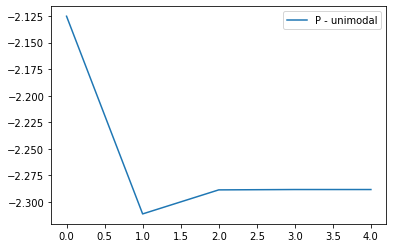

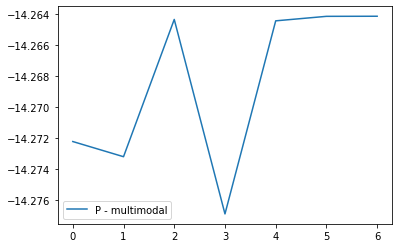

In [ ]:
plt.plot(res1[3][4][3], label='P - unimodal');
plt.legend();
plt.show()
plt.plot(res2[3][4][3], label='P - multimodal');
plt.legend();

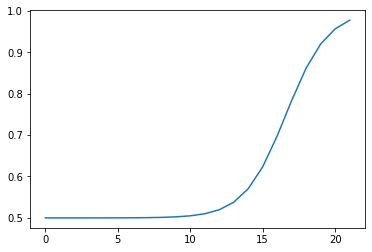

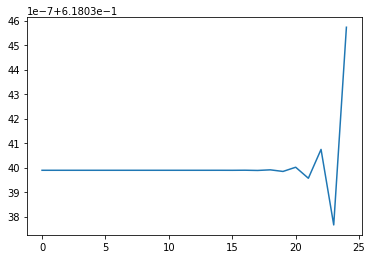

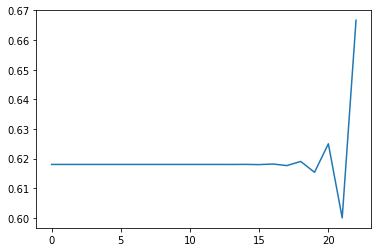

In [ ]:
for j in range(3):
    left = np.array(res2[j][4][3])
    right = np.array(res2[j][5][3])
    tmp = right - left
    ans = []
    for i in range(1, len(tmp)):
        ans.append(tmp[i]/tmp[i-1])
    plt.plot(ans)
    plt.show()

In [ ]:
left = np.array(res2[2][4][3])
right = np.array(res2[2][5][3])
tmp = right - left
ans = []
for i in range(1, len(tmp)):
    ans.append(tmp[i]/tmp[i-1])

print(ans)

[0.6180339887802427, 0.6180339886704431, 0.618033988957902, 0.6180339882053251, 0.618033990175597, 0.6180339850173571, 0.6180339985218056, 0.6180339631667059, 0.6180340557275559, 0.6180338134001206, 0.6180344478216719, 0.6180327868852367, 0.6180371352785389, 0.6180257510729904, 0.6180555555556294, 0.6179775280899367, 0.6181818181816898, 0.6176470588232309, 0.6190476190473746, 0.6153846153852534, 0.6250000000010107, 0.6000000000017252, 0.6666666666690626]


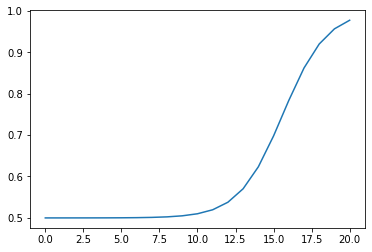

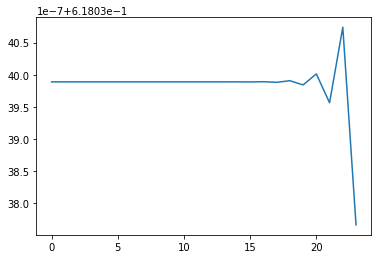

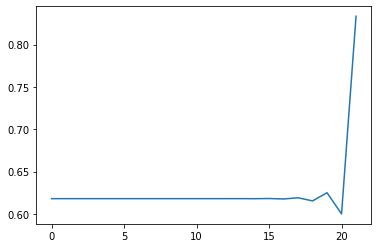

In [ ]:
for j in range(3):
    left = np.array(res1[j][4][3])
    right = np.array(res1[j][5][3])
    tmp = right - left
    ans = []
    for i in range(1, len(tmp)):
        ans.append(tmp[i]/tmp[i-1])
    plt.plot(ans)
    plt.show()